In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Load CSVs and skip bad lines
true_df = pd.read_csv('/content/True.csv', on_bad_lines='skip')
fake_df = pd.read_csv('/content/Fake.csv', on_bad_lines='skip')

# Add labels
true_df['label'] = 1  # Real news
fake_df['label'] = 0  # Fake news

# Combine and shuffle
df = pd.concat([true_df, fake_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
# Combine title and text for richer context
df['combined'] = df['title'].astype(str) + " " + df['text'].astype(str)

# Features and labels
X = df['combined']
y = df['label']

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4669
           1       0.99      0.99      0.99      4311

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



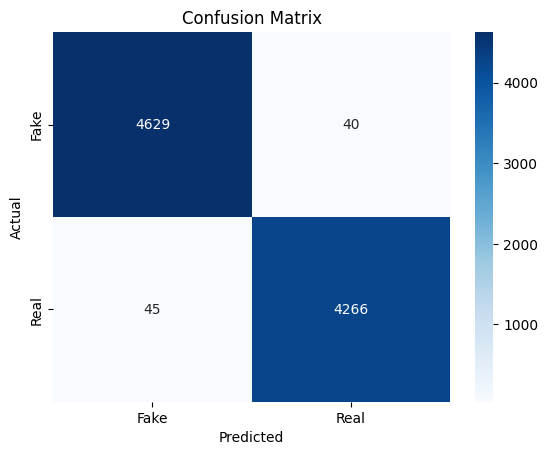

In [15]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Define your sample input
sample_text = "Aliens spotted in Mumbai, claims viral video"

# Transform it using the trained TF-IDF vectorizer
sample_vector = vectorizer.transform([sample_text])

# Predict using the trained Random Forest model
prediction = model.predict(sample_vector)[0]

# Output the result
label = "Real" if prediction == 1 else "Fake"
print(f"Prediction: {label} ➤ {sample_text}")

Prediction: Fake ➤ Aliens spotted in Mumbai, claims viral video
